In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer




df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns = ['label','text']

df['label'] = df['label'].map({'spam':1,'ham':0})


X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_vec, y_train)

pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, pred))


message=['Dear customer, get free health insurance on your bank account. Pay ₹499 now to activate plan.']



mk =vectorizer.transform(message)


print(model.predict(mk))
# df.head()


Accuracy: 0.9856502242152466
[1]


In [50]:


x=df[['text']]
y=df['label']

preprocess=ColumnTransformer(
    transformers=[
        ('tfidf',TfidfVectorizer(stop_words='english'),'text')
    ]
)

pipe=Pipeline([
    ('step',preprocess),
    ('model',MultinomialNB())
])


x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43,test_size=0.2)

pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)

print('Accuracy Score : ',np.round(accuracy_score(y_test,pred),2)*100,'%')

Accuracy Score :  97.0 %


In [51]:
messages = [
"Congratulations! You won a free iPhone! Click the link to claim now 👉 https://win-prize-free.com",
"Your ATM card has been blocked. Call 9898XXXXXX immediately to unlock.",
"Get ₹10,00,000 loan approved instantly! No documents required. Apply here 👉 http://fastloan-now.com",
"You are selected for a job at Amazon! Pay ₹1500 registration fee to confirm your position.",
"Final warning! Your account will be suspended. Verify your password now at http://secure-check.com",
"Free recharge ₹500 on your number! Only for today. Click 👉 http://free-recharge.in",
"You have won a lottery of ₹25,00,000. Contact us to claim your prize.",
"Hot singles are waiting for you. Click to chat instantly 🔞 http://adultconnect.com",
"Dear customer, get free health insurance on your bank account. Pay ₹499 now to activate plan.",
"Your Paytm KYC expired. Complete verification or account will be blocked. Click: http://fake-kyc.com"
]


print(pipe.predict(pd.DataFrame(messages,columns=['text'])))

[1 0 1 0 1 0 1 1 0 0]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = {
    'Age': [22, 24, 25, 28, 30, 31, 35, 42, 45, 48, 100],   # 100 is an outlier
    'Salary': [20000, 22000, 25000, 27000, 30000, 32000, 35000, 40000, 42000, 45000, 500000] # 5,00,000 outlier
}

df = pd.DataFrame(data)
df



,Age,Salary
0,22,20000
1,24,22000
2,25,25000
3,28,27000
4,30,30000
5,31,32000
6,35,35000
7,42,40000
8,45,42000
9,48,45000


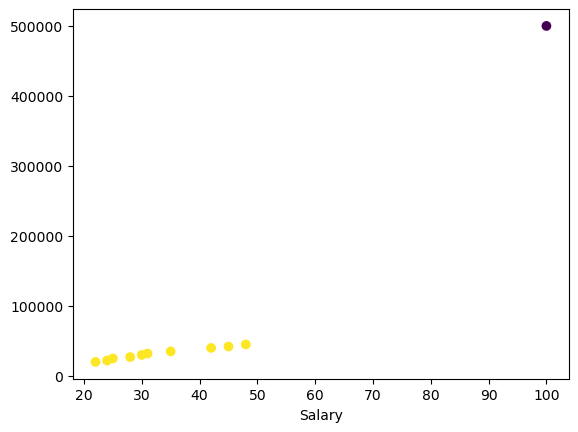

In [3]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df[['Age','Salary']])


model = DBSCAN(eps=1.2,min_samples=2)
labels=model.fit_predict(scaled)

df['Cluster']=labels


plt.scatter(df['Age'],df['Salary'],c=df['Cluster'])
plt.xlabel('Age')

plt.xlabel('Salary')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = ["I love playing football", 
         "I enjoy football game", 
         "The sky is blue"]

vec = TfidfVectorizer().fit_transform(texts)
sim = cosine_similarity(vec)

print(sim)
